In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/Praktikum/Praktikum7"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Data/college.csv')

df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [8]:
print("\nJumlah data:", len(df))
print("\nStatistik deskriptif:")
display(df.describe())

print("\nCek nilai kosong:")
print(df.isnull().sum())


Jumlah data: 8000

Statistik deskriptif:


,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000



Cek nilai kosong:
StudentID        0
Gender           0
Parent_income    0
IQ               0
Encourage        0
Plan             0
dtype: int64


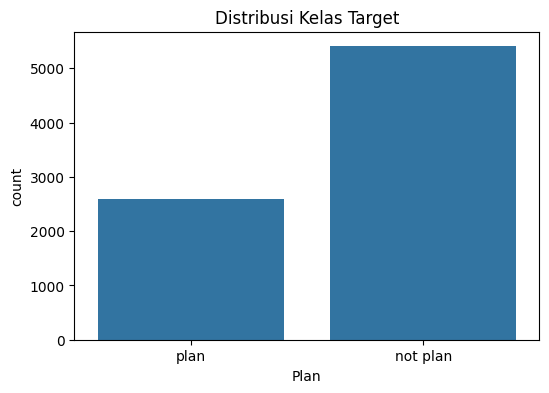

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=df.columns[-1])
plt.title('Distribusi Kelas Target')
plt.show()


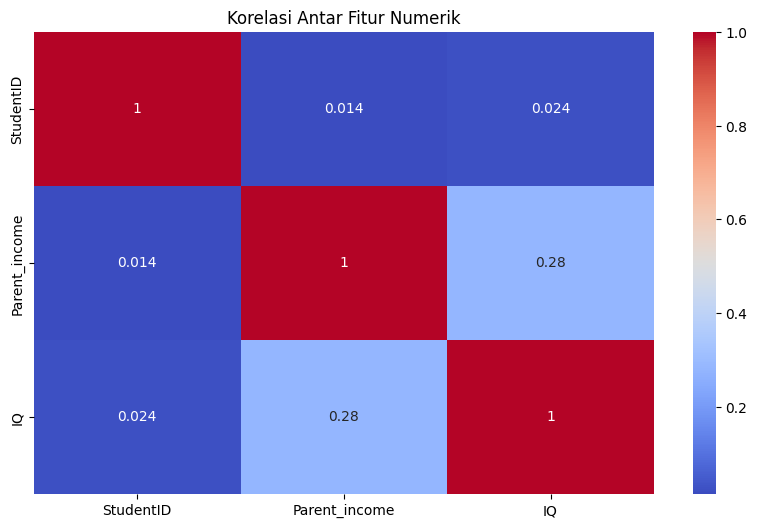

In [26]:
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [12]:
# Misalnya kolom terakhir adalah kolom target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Jika ada kolom kategorikal, ubah jadi numerik
X = pd.get_dummies(X, drop_first=True)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
model = DecisionTreeClassifier(
    criterion='entropy',    # bisa juga 'gini'
    max_depth=4,            # bisa ubah sesuai kebutuhan
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [15]:
y_pred = model.predict(X_test)

print("Akurasi Model Decision Tree:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


Akurasi Model Decision Tree: 0.826

Confusion Matrix:
 [[960 121]
 [157 362]]

Laporan Klasifikasi:
               precision    recall  f1-score   support

    not plan       0.86      0.89      0.87      1081
        plan       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



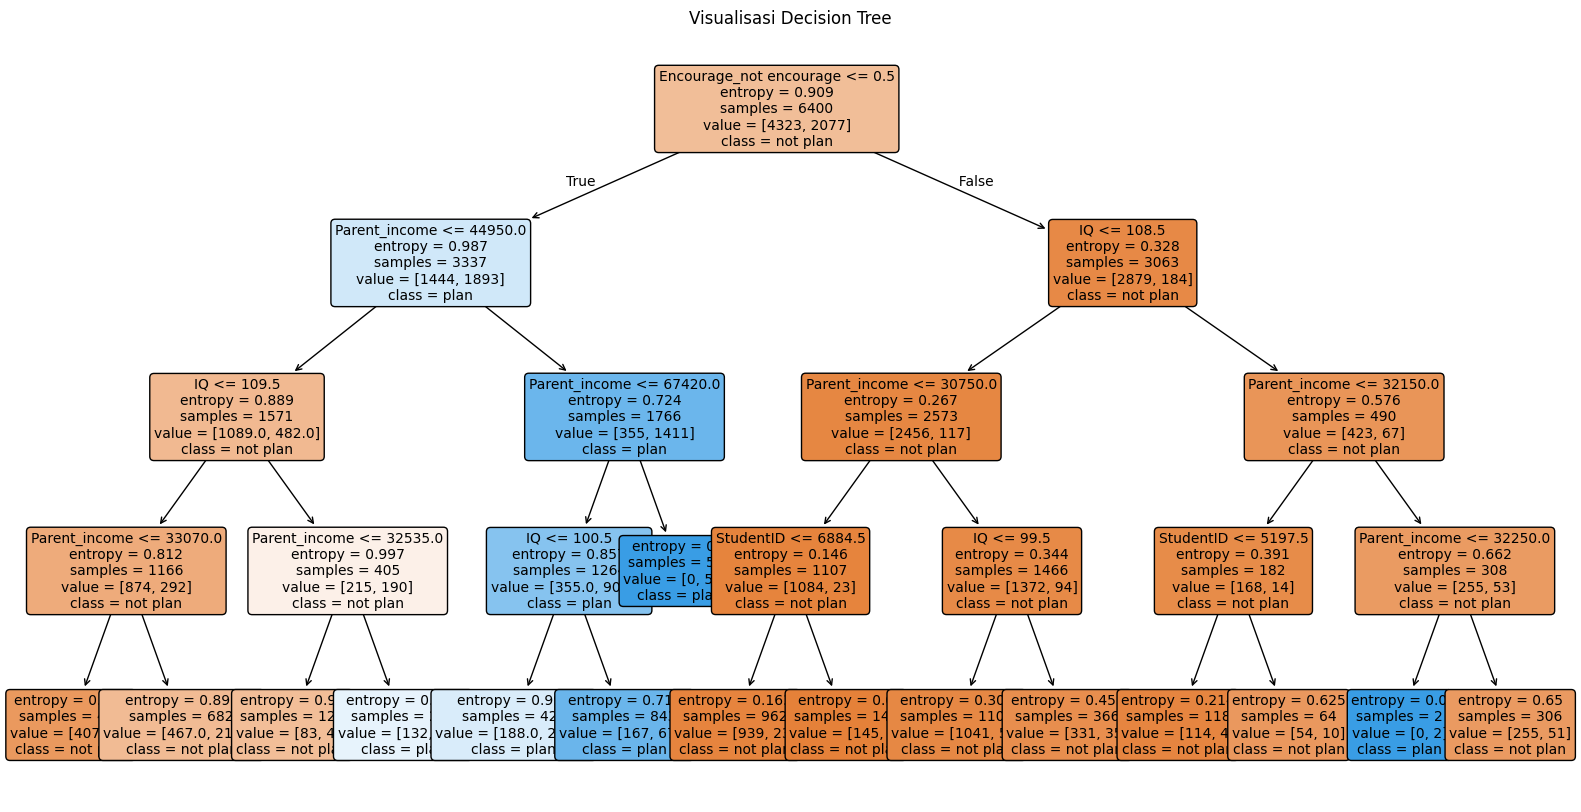

In [16]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=[str(c) for c in model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree")
plt.show()


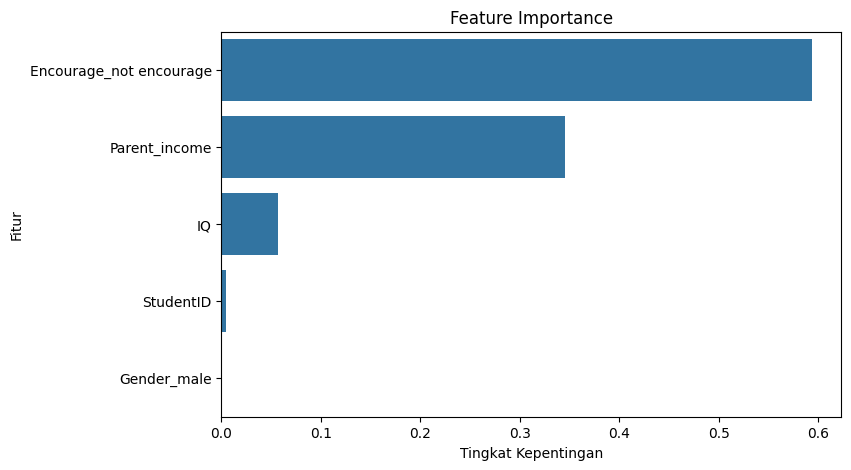

In [25]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Tingkat Kepentingan")
plt.ylabel("Fitur")
plt.show()


In [27]:
# Contoh data baru (ganti nilai sesuai kolom dataset kamu)
data_baru = pd.DataFrame({
    'age': [22],
    'gpa': [3.8],
    'SAT': [1400]
})

data_baru = pd.get_dummies(data_baru, drop_first=True).reindex(columns=X.columns, fill_value=0)

prediksi_baru = model.predict(data_baru)
print("Prediksi data baru:", prediksi_baru[0])


Prediksi data baru: not plan


In [20]:
import joblib
import os

# Define the directory path
save_dir = '/content/gdrive/MyDrive/Praktikum/Praktikum7/Models'

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the full path for the model file
model_path = os.path.join(save_dir, 'decision_tree_model.pkl')

# Save the model
joblib.dump(model, model_path)

print(f"Model saved successfully to: {model_path}")

Model saved successfully to: /content/gdrive/MyDrive/Praktikum/Praktikum7/Models/decision_tree_model.pkl
